In [692]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import pickle


In [693]:
df = pd.read_csv('Data_Pathrise.csv')

Text(0.5, 0, 'Variable Name')

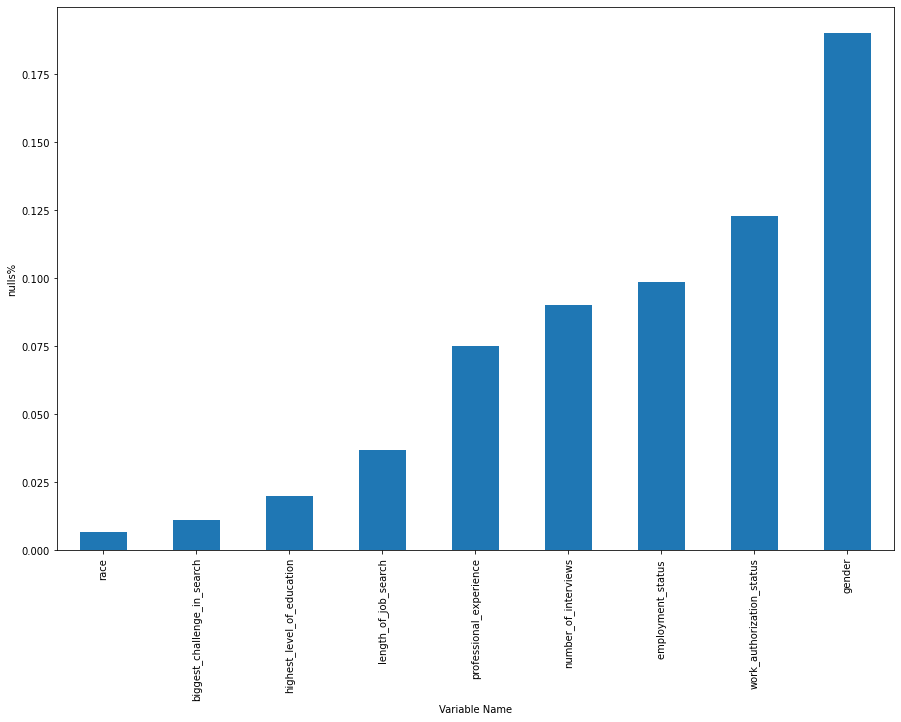

In [738]:

nulls = df.isnull().sum()

nulls = nulls[nulls > 0]
nulls.sort_values(inplace=True)
nulls = (nulls / ([len(df)]))


ax = nulls.plot.bar(figsize = (15,10))
ax.set_ylabel("nulls%")
ax.set_xlabel('Variable Name')

In [695]:
df = df[df['program_duration_days'] > 14]

In [696]:
df.drop(columns=['id','pathrise_status','cohort_tag'], axis=1, inplace=True)

In [697]:
df

,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
3,SWE,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
6,SWE,19.0,0,Employed Part-Time,Bachelor's Degree,Less than one month,Getting past final round interviews,1-2 years,Citizen,4.0,15,Female,Latino or Hispanic American
10,Data,158.0,0,Unemployed,Master's Degree,3-5 months,Lack of relevant experience,5+ years,Citizen,5.0,50,Male,Decline to Self Identify
12,PSO,52.0,0,Employed Part-Time,Bachelor's Degree,1-2 months,Lack of relevant experience,Less than one year,Citizen,4.0,40,Male,Non-Hispanic White or Euro-American
21,SWE,93.0,0,Contractor,Bachelor's Degree,6 months to a year,Hearing back on my applications,1-2 years,Citizen,1.0,10,Female,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,SWE,119.0,1,Employed Full-Time,Bachelor's Degree,1-2 months,Getting past phone screens,1-2 years,Citizen,0.0,10,Male,South Asian or Indian American
2536,SWE,118.0,0,Employed Part-Time,Master's Degree,Less than one month,Lack of relevant experience,5+ years,Other,1.0,25,Decline to Self Identify,Middle Eastern or Arab American
2537,Design,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2538,Data,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American


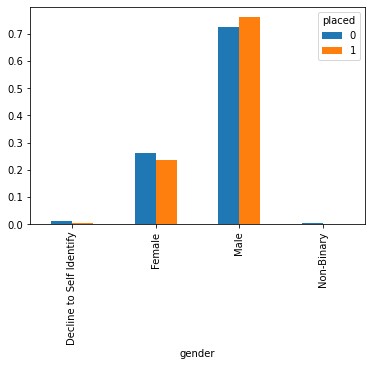

In [698]:
df_grouped = (df.groupby('placed')['gender'].value_counts(normalize=True).unstack('placed').plot.bar(stacked=False))

In [699]:
#'pathrise_status',
df_dummies = pd.get_dummies(data=df,columns=['primary_track','employment_status ','highest_level_of_education','length_of_job_search',
'biggest_challenge_in_search','professional_experience','work_authorization_status','gender','race'])

In [700]:
# cohorts = df["cohort_tag"].unique()
# cohorts = cohorts[0 : len(cohorts) - 1]
# cohorts.sort()
# chdic  = {}
# success = {}
# for i in cohorts:
#     chdic[i] = df[df["cohort_tag"] == i]
#     if(len(chdic[i]) != 0):
#         placed = chdic[i][chdic[i]["placed"] == 1]
#         success[i] = len(placed) / len(chdic[i])
#         #print(i, "  ", success[i], end="\t")
# plt.figure(figsize=(20,12))
# plt.bar(range(len(success)), list(success.values()), align='center',)
# plt.xticks(range(len(success)), list(success.keys()), rotation = 90)
# #plt.figure(figsize = (30,30))

# plt.show()    

Text(0.5, 0, 'Variable Name')

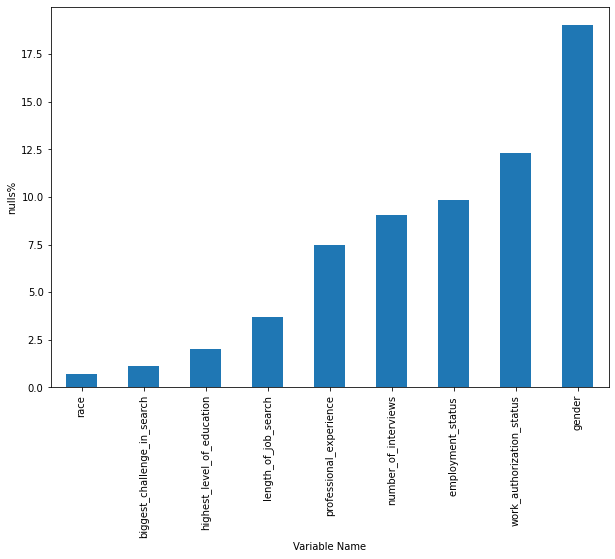

In [701]:
nulls = df.isnull().sum()
nulls = nulls[nulls > 0]
nulls.sort_values(inplace=True)
nulls = ((nulls / (len(df)) * 100))
ax = nulls.plot.bar(figsize = (10,7))
ax.set_ylabel("nulls%")
ax.set_xlabel('Variable Name')

In [702]:
df_dummies.fillna(1, inplace=True)

In [703]:
dfc = df_dummies.copy()
df_dummies.drop(columns=["program_duration_days"], axis=1, inplace=True)
X = df_dummies.drop(columns=['placed'])

In [704]:
Y = df_dummies['placed']

In [705]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2011)

In [706]:
logreg = LogisticRegression()

In [707]:
logreg.fit(X_train, Y_train)

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [708]:
predictions = logreg.predict(X_test)


In [709]:
accuracy_score(Y_test, predictions)

0.6805555555555556

In [710]:
confusion_matrix(Y_test,predictions)

array([[ 15,  67],
       [ 25, 181]], dtype=int64)

In [711]:
knn = KNeighborsClassifier()

In [712]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [713]:
prediction_knn = knn.predict(X_test)

In [714]:
accuracy_score(Y_test, prediction_knn)

0.625

In [715]:
confusion_matrix(Y_test,prediction_knn)

array([[ 17,  65],
       [ 43, 163]], dtype=int64)

In [716]:
tree = DecisionTreeClassifier()

In [717]:
tree.fit(X_train , Y_train)

DecisionTreeClassifier()

In [718]:
predict_tree = tree.predict(X_test)

In [719]:
accuracy_score(Y_test, predict_tree)

0.5520833333333334

In [720]:
confusion_matrix(Y_test,predict_tree)

array([[ 35,  47],
       [ 82, 124]], dtype=int64)

In [721]:
rf = RandomForestClassifier()

In [722]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [723]:
predict_rf = rf.predict(X_test)

In [724]:
accuracy_score(Y_test, predict_rf)


0.6875

In [725]:
confusion_matrix(Y_test,predict_rf)

array([[ 17,  65],
       [ 25, 181]], dtype=int64)

In [726]:
confusion_matrix(Y_test,prediction_knn)

array([[ 17,  65],
       [ 43, 163]], dtype=int64)

In [727]:
confusion_matrix(Y_test,predict_tree)

array([[ 35,  47],
       [ 82, 124]], dtype=int64)

In [728]:
confusion_matrix(Y_test,predict_rf)

array([[ 17,  65],
       [ 25, 181]], dtype=int64)

In [729]:

dfc = dfc[dfc["placed"] == 1]
dfc

,program_duration_days,placed,number_of_interviews,number_of_applications,primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,...,gender_Non-Binary,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
3,89.0,1,10.0,100,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
22,193.0,1,5.0,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
29,73.0,1,0.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
38,83.0,1,1.0,15,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
53,76.0,1,0.0,30,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,31.0,1,6.0,6,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2526,277.0,1,1.0,45,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2529,310.0,1,0.0,6,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2531,33.0,1,0.0,9,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [730]:
X = dfc.drop(columns=['program_duration_days'])
X

,placed,number_of_interviews,number_of_applications,primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status _Contractor,...,gender_Non-Binary,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
3,1,10.0,100,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
22,1,5.0,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29,1,0.0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
38,1,1.0,15,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
53,1,0.0,30,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,1,6.0,6,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2526,1,1.0,45,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2529,1,0.0,6,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2531,1,0.0,9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [731]:
Y = dfc['program_duration_days']
dfc

,program_duration_days,placed,number_of_interviews,number_of_applications,primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,...,gender_Non-Binary,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
3,89.0,1,10.0,100,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
22,193.0,1,5.0,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
29,73.0,1,0.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
38,83.0,1,1.0,15,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
53,76.0,1,0.0,30,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,31.0,1,6.0,6,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2526,277.0,1,1.0,45,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2529,310.0,1,0.0,6,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2531,33.0,1,0.0,9,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [732]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 2711)

In [733]:
lr = LinearRegression()

In [734]:
lr.fit(X_train,Y_train)

LinearRegression()

In [735]:
lr.fit(X_train,Y_train)

LinearRegression()

In [736]:
predictions = lr.predict(X_test)
predictions

array([199.16690391, 173.95699572, 232.98401927, 188.68784089,
       159.97818202, 145.6118235 , 208.88815586, 131.8390962 ,
       171.40839733, 214.92852394, 259.86376718, 203.20681848,
       128.16715748, 157.47171724, 143.38863967, 165.27633492,
        96.19593387, 132.87559887, 166.38793978, 195.23586435,
       206.67753081, 142.43029571, 118.58154225, 141.67412522,
       161.66677754, 179.94401206, 145.79829309, 112.36763798,
       232.62037811, 214.86865342, 164.14185976, 122.88111918,
       168.41665197, 179.46015976, 164.30865904, 170.09811795,
       102.22888816, 184.64907376, 210.46142668, 214.28709728,
       187.03612397, 128.15071189, 226.50016403, 211.3843971 ,
       213.30267169, 144.52094598, 108.91636753, 147.78372837,
       122.42830479, 182.52948428, 163.1419681 , 146.69908133,
       248.38422625, 161.86187774, 219.70117672, 157.07785745,
       237.5624225 , 114.93731873, 103.44372853, 152.3863442 ,
       141.4968726 , 215.03215585, 174.43241694, 115.30

In [737]:
print('MAE:', mean_absolute_error(Y_test, predictions))

MAE: 90.76263682139482
